## Contexto

En esta práctica trabajaremos con un conjunto de datos publicado por el Gobierno de Canadá sobre las emisiones de dióxido de carbono (CO₂) de vehículos vendidos en ese país. Cada fila representa un modelo de coche con sus especificaciones técnicas y su nivel de emisiones medido en gramos de CO₂ por kilómetro recorrido.

Este conjunto de datos es apropiado para un problema de regresión supervisada, ya que la variable objetivo (CO2 Emissions(g/km)) es continua. El objetivo es comparar el rendimiento de tres algoritmos de regresión basados en árboles: Random Forest, Gradient Boosting y XGBoost.


Descripción de las variables:

  - Make: marca del vehículo.
  - Model: modelo del vehículo.
  - Vehicle Class: clase del vehículo (SUV, Compact, Pickup, etc.).
  - Engine Size (L): tamaño del motor en litros.
  - Cylinders: número de cilindros.
  - Transmission: tipo de transmisión.
  - Fuel Type: tipo de combustible (Gasolina, Diésel, Eléctrico, etc.).
  - Fuel Consumption City (L/100 km): consumo en ciudad.
  - Fuel Consumption Hwy (L/100 km): consumo en carretera.
  - Fuel Consumption Comb (L/100 km): consumo combinado.
  - CO2 Emissions (g/km): variable objetivo, emisiones de CO2.


**Se pide**:

Aplicar los siguientes tres algoritmos de regresión basados en árboles para predecir las emisiones de CO2 (CO2 Emissions (g/km)) en función del resto de variables:

1. Random Forest Regressor
2. Gradient Boosting Regressor
3. XGBoost Regressor

# Preparación del Entorno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Instalar xgboost
!pip install xgboost

In [27]:
#Corroborar que se instaló xgboost
import xgboost as xgb
print("Versión de XGBoost:", xgb.__version__)

Versión de XGBoost: 2.1.4


##Carga del dataset

In [2]:
#carga datos
df = pd.read_csv('https://raw.githubusercontent.com/gustavox0/Tecnicas_ML/refs/heads/main/CO2%20Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
print("Número de instancias del dataset:", df.shape[0])
print("Número de atributos del dataset:", df.shape[1]-1)
print("La variable objetivo es:" , df.columns[-1])

Número de instancias del dataset: 7385
Número de atributos del dataset: 11
La variable objetivo es: CO2 Emissions(g/km)


# 1. Preprocesado


- Eliminar columnas irrelevantes como Model o Make, o codificarlas si se consideran útiles.

No se considera que el modelo y la marca sean variables útiles por lo que las vamos a eliminar.

In [3]:
#Eliminar columnas make y model
df0 = df.copy()
df0=df0.drop(['Make', 'Model'], axis=1)

Ahora el nuevo dataset contiene solo 9 atributos y el target (C02 Emmisions(g/km).

In [32]:
print("Número de atributos del dataset:", df0.shape[1]-1)
df0.head()

Número de atributos del dataset: 9


,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


  - Convertir las variables categóricas (Transmission, Fuel Type, Vehicle Class) a numéricas con codificación (LabelEncoder o OneHotEncoder)

In [4]:
from sklearn.preprocessing import LabelEncoder

df1 = df0.copy()
# Crear un encoder por columna y almacenar mapeos para mostrar la codificación de los valores de cada variable posteriormente
encoders = {}
mapeos = {}

for col in ['Transmission', 'Fuel Type', 'Vehicle Class']:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])  # Codificar
    encoders[col] = le  # Guardar encoder
    mapeos[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Guardar mapeo

print("Dataset codificado:")
df1.head()

Dataset codificado:


,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [5]:
# Códigos transformados
tabla_codigos = pd.DataFrame(
    [(var, cat, cod) for var, cats in mapeos.items() for cat, cod in cats.items()],
    columns=['Variable', 'Categoría Original', 'Código Asignado']
)

print("\n=== TABLA DE CÓDIGOS ===")
print(tabla_codigos.to_string(index=False))


=== TABLA DE CÓDIGOS ===
     Variable       Categoría Original  Código Asignado
 Transmission                      A10                0
 Transmission                       A4                1
 Transmission                       A5                2
 Transmission                       A6                3
 Transmission                       A7                4
 Transmission                       A8                5
 Transmission                       A9                6
 Transmission                      AM5                7
 Transmission                      AM6                8
 Transmission                      AM7                9
 Transmission                      AM8               10
 Transmission                      AM9               11
 Transmission                     AS10               12
 Transmission                      AS4               13
 Transmission                      AS5               14
 Transmission                      AS6               15
 Transmission         

- Comprobar si hay valores nulos y tratarlos adecuadamente

In [6]:
print("Cantidad de nulos por columna:")
print(df1.isnull().sum())

Cantidad de nulos por columna:
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


Como se observa, el dataset no contiene datos nulos por lo que no es necesario realizar un tratamiento adicional para el modelado.

# 2. Modelado

  - Entrenar un modelo con cada uno de los tres algoritmos.

  Antes de entrenar cada modelo, partimos el dataset con que trabajaremos en entrenamiento (70%) y evaluacion (30%)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,0:-1], df1.iloc[:,-1], test_size=0.3, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(5169, 9)
(5169,)
(2216, 9)
(2216,)


## **Modelo Random Forest**

Para entrenar el modelo de Random Forest debemos decidir los parámetros óptimos: número de arboles (*n_estimators*), la profundidad (*max_depth*) y el número de atributos (*max_features*). Dado que tenemos un modelo de regresión, el modelo utilizará el total de variables predictoras (F), sin embargo vamos a establecer que en cada arbol utilice la raíz cuadrada del número de variables (*sqrt*).  

### Optimización de parámetros

  Para encontrar los parámetros óptimos, vamos a aplicar una estrategia de gridsearch para los parámetros max_depth y n_estimators.

**profundidad de los árboles**

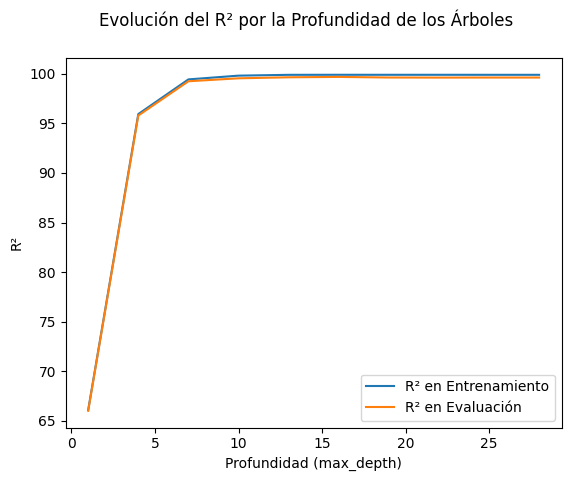

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

n_jobs = 5 #número de procesos en paralelo
n_estimators = 15 #iniciamos con 15 árboles

#probamos la profuncidad de 1 a 30 con saltos de 3
minDepth = 1
maxDepth = 30
hop = 3

md_list = []
r2_train_list = []
r2_test_list = []

for maxdepth in list(range(minDepth,maxDepth,hop)):
  rf_model = RandomForestRegressor(random_state=0, max_depth=maxdepth, n_jobs=n_jobs, n_estimators=n_estimators,max_features="sqrt")
  rf_model.fit(X_train, y_train)

#Calcular R2 para train y test
  r2_train = r2_score(y_train, rf_model.predict(X_train))
  r2_test = r2_score(y_test, rf_model.predict(X_test))

  md_list.append(maxdepth)
  r2_train_list.append(100.0*rf_model.score(X_train, y_train))
  r2_test_list.append(100.0*rf_model.score(X_test, y_test))

#Visualizar rendimiento
dataset = pd.DataFrame({"max_depth":md_list,
                   "R2_train":r2_train_list,
                   "R2_test":r2_test_list})

dataset.set_index("max_depth", inplace=True)
dataset["R2_train"].plot(label="R² en Entrenamiento")
dataset["R2_test"].plot(label="R² en Evaluación")
plt.suptitle("Evolución del R² por la Profundidad de los Árboles")
plt.ylabel("R²")
plt.xlabel("Profundidad (max_depth)")
plt.legend()
plt.show();

Como puede observarse, el modelo tiene un R2 muy elevado para cualquier nivel de profundidad a partir de 4, tanto en los datos de prueba como en los de entrenamiento. Dado que los árboles deben ser simples en Random Forest, seleccionamos una profundida de 4, que ya muestra una precisión cercana al 90%.

**Número de árboles**

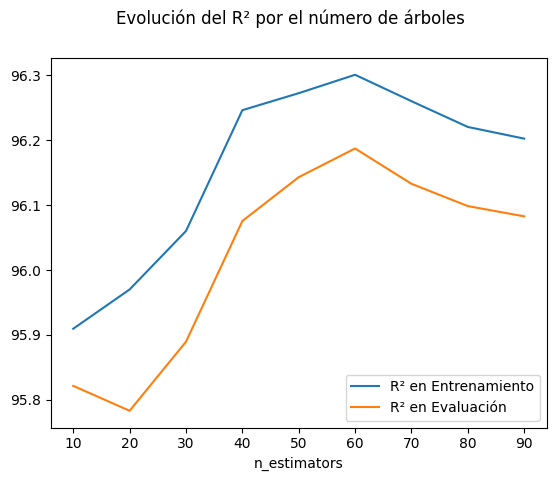

In [53]:
n_jobs = 5
max_depth = 4 #número óptimo determinado anteriormente

minEstimators = 10
maxEstimators = 100
hop = 10

# Listas para almacenar resultados
md_list = []
r2_train_list = []
r2_test_list = []

for n_estimators in range(minEstimators, maxEstimators, hop):
    rf_model = RandomForestRegressor(random_state=0,max_depth=max_depth,n_jobs=n_jobs,n_estimators=n_estimators,max_features="sqrt")
    rf_model.fit(X_train, y_train)

    # Calcular R² para train y test
    r2_train = r2_score(y_train, rf_model.predict(X_train))
    r2_test = r2_score(y_test, rf_model.predict(X_test))

    md_list.append(n_estimators)
    r2_train_list.append(100.0 * r2_train)  # Convertir a porcentaje
    r2_test_list.append(100.0 * r2_test)    # Convertir a porcentaje

#Visualizar rendimiento
dataset = pd.DataFrame({"n_estimators":md_list,
                   "R2_train":r2_train_list,
                   "R2_test":r2_test_list})

dataset.set_index("n_estimators", inplace=True)
dataset["R2_train"].plot(label="R² en Entrenamiento")
dataset["R2_test"].plot(label="R² en Evaluación")
plt.suptitle("Evolución del R² por el número de árboles")
plt.legend()
plt.show();

Como puede observarse, la R2 del modelo es mayor en un número de árboles cercano a 60. Nótese que este modelo ya tiene una alta R2 (95%) desde 30 árboles. Esta R2 incrementa en 1% hasta los 60 árboles, por lo que el costo computacional puede resultar elevado en comparación con la mejora en la capacidad predictiva del modelo. Además, mayor número de árboles aumentan la complejidad del modelo. Por ello, consideramos 30 como el valor óptimo del número de árboles del modelo.

### Importancia de variables

Text(0.5, 1.0, 'Importancia de las Variables en el Modelo Random Forest')

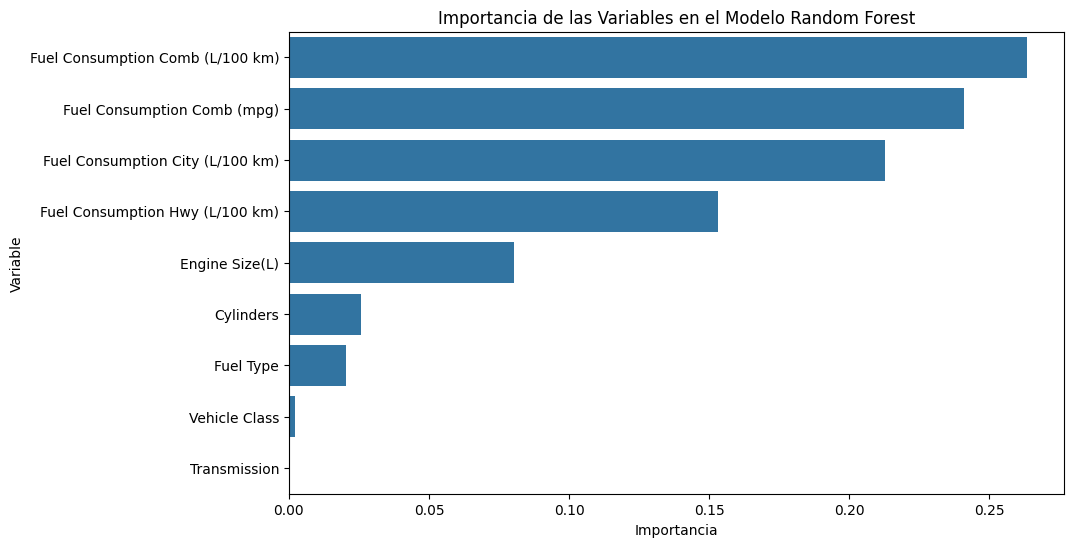

In [54]:
#Modelo con parámetros optimizados
rf_model = RandomForestRegressor(random_state=0, max_depth=4, n_jobs=5, n_estimators=30,max_features="sqrt")
rf_model.fit(X_train, y_train)

#visualizar importancia de las variables con modelo optimizado
importances_rf = rf_model.feature_importances_
feature_names_rf = X_train.columns
feature_importance_rf = pd.DataFrame({'Variable': feature_names_rf, 'Importancia': importances_rf})
feature_importance_rf = feature_importance_rf.sort_values(by='Importancia', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_rf)
plt.title('Importancia de las Variables en el Modelo Random Forest')

Como puede observase, a excepción de la variable "Transmission", el resto de las variables son importantes para predecir las emisiones de CO2, aunque en distinta medida. La variable más importante es, como habría de esperarse, el consumo de combustible (combinado, en la ciudad y en carretera). Esto ya que la quema del combustible genera directamente CO2. Le siguen en importancia el tamaño del motor, el número de cilindros y el tipo de combustible que utiliza. La variable menos importante es la clase del vehículo.

### Entrenamiento del modelo

  Entrenamos el modelo considerando los parametros optimizados sobre la profundidad (4) y el número de árboles (30). Aprovechamos para generar la matriz de confusión y las metricas.

In [86]:
#Modelo con parámetros optimizados
rf_model_optimo = RandomForestRegressor(random_state=0, max_depth=4, n_jobs=5, n_estimators=30,max_features="sqrt")
rf_model_optimo.fit(X_train, y_train)

pred_train = rf_model_optimo.predict(X_train)
pred_test = rf_model_optimo.predict(X_test)


mae_RF = mean_absolute_error(y_test, pred_test)
mse_RF = mean_squared_error(y_test, pred_test)
rmse_RF = np.sqrt(mse_RF)
r2_RF = r2_score(y_test, pred_test)

Precision_train_RF=100.0*rf_model_optimo.score(X_train, y_train)
Precision_test_RF=100.0*rf_model_optimo.score(X_test, y_test)

# Imprimir las métricas de evaluación del modelo Random Forest
print("Mean Absolute Error (MAE): {:.3f}".format(mae_RF))
print("Mean Squared Error (MSE): {:.3f}".format(mse_RF))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse_RF))
print("R-squared (R2): {:.3f}".format(r2_RF))
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(Precision_train_RF))
print("Precisión sobre los datos de test: {:.2f}".format(Precision_test_RF))

Mean Absolute Error (MAE): 6.447
Mean Squared Error (MSE): 138.842
Root Mean Squared Error (RMSE): 11.783
R-squared (R2): 0.959
Precisión sobre los datos de entrenamiento: 96.06
Precisión sobre los datos de test: 95.89


### Evaluación de modelo

El modelo tiene un buen desempeño si lo medimos por la R2. Su precisión es del 96% en los datos de entrenamiento y logra ser del 95.6% en los datos de prueba.  

## **Gradient Boosting**

### Optimización de parámetros

Para el este modelo, vamos a utilizar como modelo base (weak learner) a los árboles de decisión. En tal sentido, los hiperparámetros importantes son nuevamente la profundidad de los árboles, el número de árboles y la **tasa de aprendizaje**.

**Profundidad de los árboles**

Una de las virtudes del modelo Gradient Boosting es que los weak learners son sencillos y su fortaleza radica en ir mejorando con cada iteración a partir del primer modelo o arbol entrenado. Por esta razón, vamos a utilizar árboles sencillos de profundidad 1.

**Número de árboles** y **Tasa de aprendizaje**

Dado que el número de árboles está vinculado con la tasa de aprendizaje (un mauor número de árboles pued requerir una tasa de apendizaje más baja para controlar la convergencia y evitar el sobreajuste, mientras que un menor numero de arboles puede requerir una tasa de aprendizaje más alta para acelerar la convergencia y evitar subajuste) debemos encontrar la combinación óptima del número de árboles y la tasa de aprendizaje. Para ello, a continuación probamos el rendimiento del modelo (R2) para distintas combinaciones del número de árboles y tasas de aprendizaje.

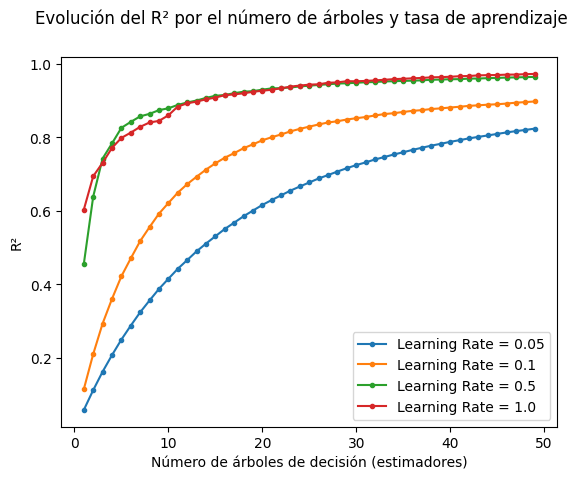

In [59]:
max_depth = 1 #weak learner más simple
min = 1
max = 50

for learning_rate in [0.05, 0.1, 0.5, 1.0]:
  R2_list = []
  for n_estimators in range (min, max):
    gb_model = GradientBoostingRegressor(random_state=0, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    gb_model.fit(X_train, y_train)
    R2_list.append(gb_model.score(X_test, y_test))

  plt.plot(range(min,max), R2_list, marker='.', linestyle='-', label="Learning Rate = " + str(learning_rate))

plt.suptitle("Evolución del R² por el número de árboles y tasa de aprendizaje")
plt.xlabel('Número de árboles de decisión (estimadores)')
plt.ylabel("R²")
plt.legend()
plt.show()


De acuerdo con el gráfico anterior, la combinación del número de arboles y tasa de aprendizaje que tiene un mayor rendimiento sin caer en sobreajuste o subajuste es para una tasa de 1.0 y alrededor de 30 árboles. Por tal razón, consideramos como parámetros óptimos de este modelo los siguientes:

  - tasa de aprendizaje: 1.0
  - número de árboles: 30
  - profundidad del arbol: 1

### Importancia de variables

Para ver la importancia de las variables en el modelo, aplicamos el modelo nuevamente con los parámetros óptimos determinados previamente.

Text(0.5, 1.0, 'Importancia de las Variables en el Modelo Gradient Boosting')

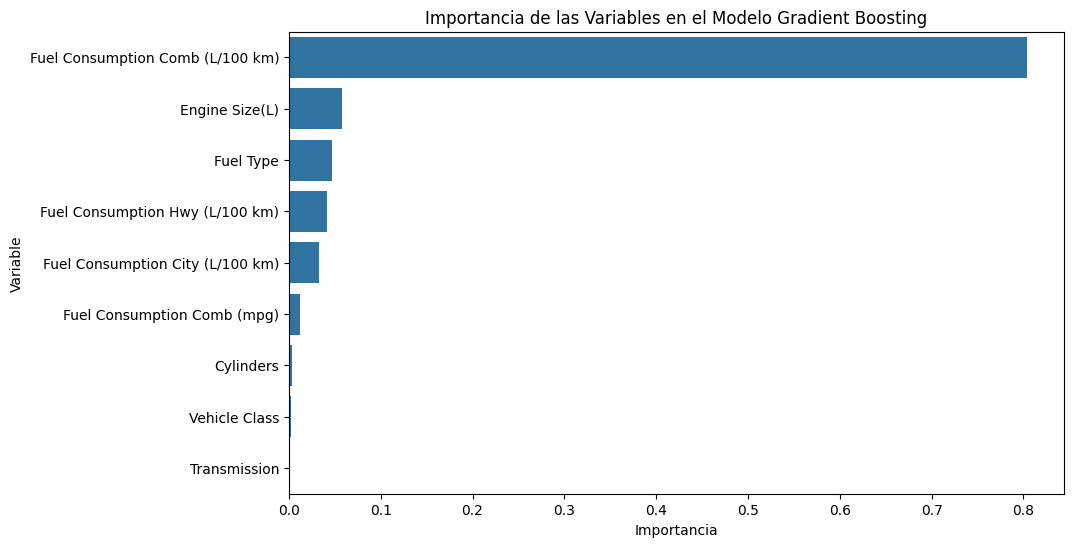

In [57]:
#Modelo con parámetros optimizados
GB_model = GradientBoostingRegressor(random_state=0, n_estimators=30, max_depth=1, learning_rate=1)
GB_model.fit(X_train, y_train)

#visualizar importancia de las variables con modelo optimizado
importances_GB = GB_model.feature_importances_
feature_names_GB = X_train.columns
feature_importance_GB = pd.DataFrame({'Variable': feature_names_GB, 'Importancia': importances_GB})
feature_importance_GB = feature_importance_GB.sort_values(by='Importancia', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_GB)
plt.title('Importancia de las Variables en el Modelo Gradient Boosting')

Como se observa, a diferencia del modelo Random Forest, el Gradient Boosting considera de mayor importancia a la variable Fuel Consumption Comb (L/100 km) y le resta importancia a las variables Cylinders y Vehicle Class. Al igual que el modelo Random Forest, este tampoco considera relevante la variable "Transmission". Es importante observar como la variable Fuel Consumption Comb (mpg) perdió relevancia con respecto al modelo de Random Forest.

### Entrenamiento del modelo

A continuación, entrenamos el modelo con los hiperparámetros óptimos. Aprovechamos para generar la matriz de confusión y las metricas.

In [87]:
#Modelo con parámetros optimizados
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

GB_model_optimo = GradientBoostingRegressor(random_state=0, n_estimators=30, max_depth=1, learning_rate=1)
GB_model_optimo.fit(X_train, y_train)

pred_train = GB_model_optimo.predict(X_train)
pred_test = GB_model_optimo.predict(X_test)


mae_GB = mean_absolute_error(y_test, pred_test)
mse_GB = mean_squared_error(y_test, pred_test)
rmse_GB = np.sqrt(mse_GB)
r2_GB = r2_score(y_test, pred_test)

Precision_train_GB=100.0*GB_model_optimo.score(X_train, y_train)
Precision_test_GB=100.0*GB_model_optimo.score(X_test, y_test)

# Imprimir las métricas de evaluación del modelo Gradient Boosting
print("Mean Absolute Error (MAE): {:.3f}".format(mae_GB))
print("Mean Squared Error (MSE): {:.3f}".format(mse_GB))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse_GB))
print("R-squared (R2): {:.3f}".format(r2_GB))
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(Precision_train_GB))
print("Precisión sobre los datos de test: {:.2f}".format(Precision_test_GB))

Mean Absolute Error (MAE): 9.760
Mean Squared Error (MSE): 161.611
Root Mean Squared Error (RMSE): 12.713
R-squared (R2): 0.952
Precisión sobre los datos de entrenamiento: 95.70
Precisión sobre los datos de test: 95.22


### Evaluación del modelo

En general, el desempeño del modelo es muy similar al de Random Forest.
En este caso,la R2 en los datos de entrenamiento es de 95.7% (en Random Forest fue de 96%) y
en los datos de prueba del 95.2% (en Random Forest fue de 95.6%).  

## **Modelo XGBoost Regressor**

Este modelo parte de la base del Gradient Boosting pero supone ser más preciso, rápido y eficiente. A diferencia de lo modelo Gradient Boostingl el XGBoost puede funcionar con datos faltantes en el dataset. La implementación de este modelo se hace mediante la minimización de una función de pérdida regularizada que penaliza la complejidad de los árboles de decisión. Además de usar el gradiente (primeras derivadas) en la funcion de pérdida, utiliza las segundas derivadas (Hessiana) para una convergencia más rápida, lo que lo hace más eficiente que el Gradient Boosting.

### Optimización de parámetros

Dado que este modelo tiene como base el Gradient Boost, también utiliza los hiperparámetros de profundidad, número de árboles y tasa de aprendizaje. Sin embargo, en este caso los parámetros *subsample* y *colsample_bytree* son importantes para prevenir el sobreajuste y dar mayor precisión al modelo.
*subsample* se utiliza para controlar el número de instancias que se utilizan para cada arbol, lo que evita que el modelo se ajuste demasiado a los mismos datos y por tanto, ayuda a evitar el sobreajuste. *colsample_bytree*, por otro lado, se utiliza para controlar el número de atributos o variables con que se entrenará cada arbol, lo que evita que los árboles dependan demasiado de características dominantes (por ejemplo, de Fuel Consumption Comb (L/100 km) en nuestro caso), lo que también ayuda a reducir el sobreajuste del modelo.

Además, dado que bajo esta metodología se penaliza la complejidad de los árboles, podemos determinar también la profundidad del árbol. Por tanto, los parámetros que vamos a optimizar son:

  - profundidad o max_depth
  - número de arboles y tasa de aprendizaje (n_estimator y learning_rate)
  - numero de instancias (subsample) y atributos (colsample_bytree) que utiliza cada arbol.


**Profundidad**

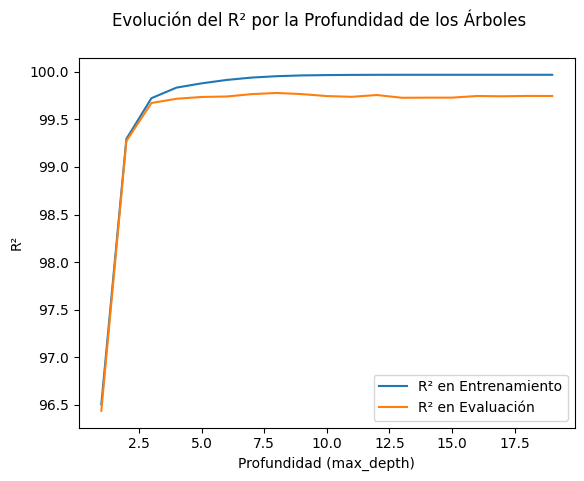

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

tasa_aprendizaje=0.5 #tasa de 0,5
numero_arboles=50

#probamos la profuncidad de 1 a 20 con saltos de 1
minDepth = 1
maxDepth = 20
hop = 1

md_list = []
r2_train_list = []
r2_test_list = []

for maxdepth in list(range(minDepth,maxDepth,hop)):
  XG_model = xgb.XGBRegressor(n_estimators=numero_arboles,learning_rate=tasa_aprendizaje,max_depth=maxdepth,random_state=0)
  XG_model.fit(X_train, y_train)

#Calcular R2 para train y test
  r2_train = r2_score(y_train, XG_model.predict(X_train))
  r2_test = r2_score(y_test, XG_model.predict(X_test))

  md_list.append(maxdepth)
  r2_train_list.append(100.0*XG_model.score(X_train, y_train))
  r2_test_list.append(100.0*XG_model.score(X_test, y_test))

#Visualizar rendimiento
dataset = pd.DataFrame({"max_depth":md_list,
                   "R2_train":r2_train_list,
                   "R2_test":r2_test_list})

dataset.set_index("max_depth", inplace=True)
dataset["R2_train"].plot(label="R² en Entrenamiento")
dataset["R2_test"].plot(label="R² en Evaluación")
plt.suptitle("Evolución del R² por la Profundidad de los Árboles")
plt.ylabel("R²")
plt.xlabel("Profundidad (max_depth)")
plt.legend()
plt.show();

De acuerdo con lo anterior, para una profunidad del árbol de 3, la R2 es elevada y el modelo no se observa sobreajustado, ya que la R2 en los datos de prueba se asemejan mucho a los datos de entrenamiento (superior a 99%). Por tanto, la produndidad del árbol a utilizar es 3.

**Número de árboles** y **Tasa de aprendizaje**

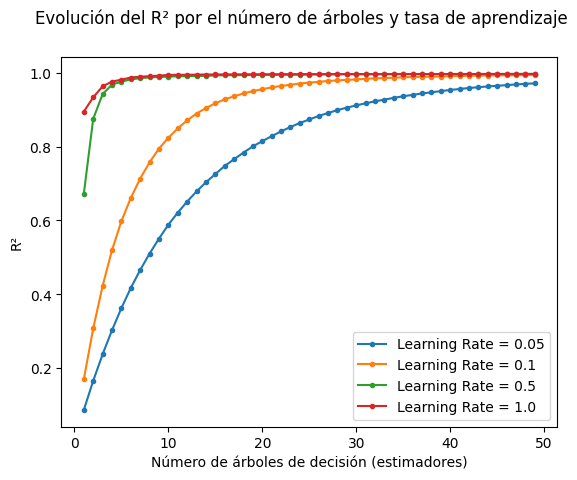

In [33]:
max_depth = 3 #determinado en paso anterior
min = 1
max = 50

for learning_rate in [0.05, 0.1, 0.5, 1.0]:
  R2_list = []
  for n_estimators in range (min, max):
    XG_model = xgb.XGBRegressor(random_state=0,n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)
    XG_model.fit(X_train, y_train)
    R2_list.append(XG_model.score(X_test, y_test))

  plt.plot(range(min,max), R2_list, marker='.', linestyle='-', label="Learning Rate = " + str(learning_rate))

plt.suptitle("Evolución del R² por el número de árboles y tasa de aprendizaje")
plt.xlabel('Número de árboles de decisión (estimadores)')
plt.ylabel("R²")
plt.legend()
plt.show()


Como puede observarse, el modelo el altamente preciso (R2 casi del 100%) para una combinación de 5 árboles y una tasa de aprendizaje de 1.0. Por tanto, los parámetros a considerar son n_estimators=5 y learning_rate=1.0.

**Numero de instancias** y **Número de atributos**

Para optimizar estos parámetros, voy a mostrar como cambia la R2 con las distintas combinaciones del número de instancias y el número de variables con las que se entrena a cada arbol. Debido a la gran cantidad de combinaciones, voy a mostrar los resultados en una matriz que muestre como cambia la R2 con las combinaciones de dichos parámetros.

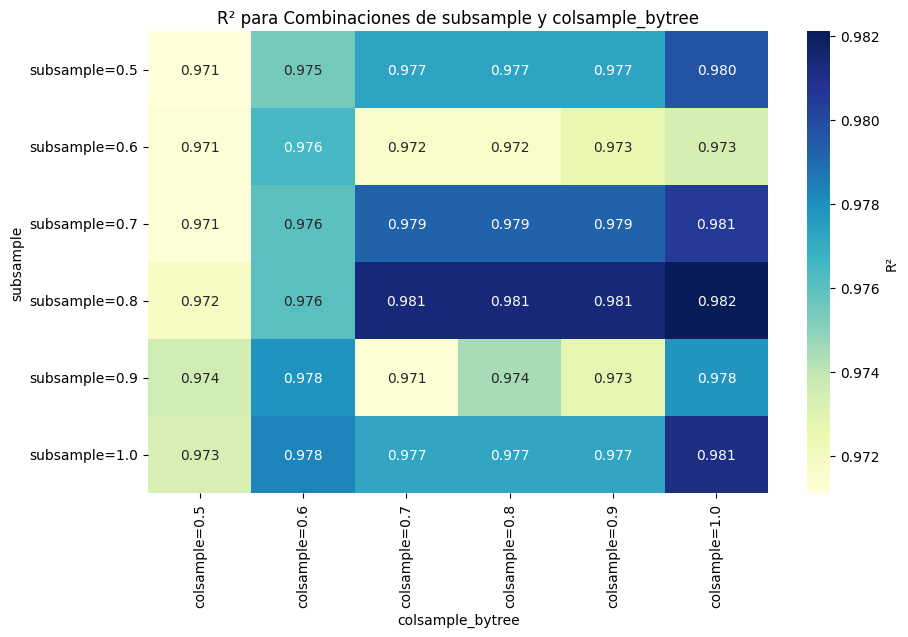

In [60]:
import seaborn as sns

max_depth = 3 #determinado en paso anterior
max_estimators = 5 #determinado en paso anterior
learning_rate = 1.0 #determinado en paso anterior
subsample_values = np.linspace(0.5, 1.0, 6)
colsample_values = np.linspace(0.5, 1.0, 6)

# Almacenar resultados en una matriz
r2_matrix = np.zeros((len(subsample_values), len(colsample_values)))

for i,Ncol in enumerate(colsample_values):#ciclo para número de variables
  R2_list = []
  for j,sample in enumerate(subsample_values):#ciclo para número de instancias
    XG_model = xgb.XGBRegressor(random_state=0,
                                n_estimators=max_estimators,max_depth=max_depth,learning_rate=learning_rate,
                                subsample=sample, colsample_bytree=Ncol)
    XG_model.fit(X_train, y_train)
    r2_matrix[j, i] = XG_model.score(X_test, y_test)  # Guardar R² en matriz

# Convertir a DataFrame para mejor visualización
results = pd.DataFrame(
    r2_matrix,
    index=[f"subsample={v:.1f}" for v in subsample_values],
    columns=[f"colsample={v:.1f}" for v in colsample_values]
)
# Visualización: Heatmap de R²
plt.figure(figsize=(10, 6))
sns.heatmap(
    results,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    cbar_kws={'label': 'R²'}
)
plt.title("R² para Combinaciones de subsample y colsample_bytree")
plt.xlabel("colsample_bytree")
plt.ylabel("subsample")
plt.show()


Los colores más claros muestran las combinaciones del número de instancias y atributos con los que se entrena cada árbol y que resultan en R2 más bajos. Por el contrario, los colores más intensos muestran las mejores combinaciones de estos parámetros en términos de mejor R2.
Como se observa de la matriz, la mejor combinación de instancias y atributos para entrenar los árboles es con el 80% de las instancias y con todos los atritubos. Con esta combinación de parámetros se logra una R2 de 0.982 (color azul más intenso en la matriz). Por tanto, los valores óptimos para entrenar cada árbol en el modelo son:

  - subsample=0.8
  - colsample_bytree=1.0

Así, los hiperparámetros que optimizan el modelo son:
  - max_depth=3
  - n_estimators=5
  - learning_rate=1.0
  - subsample=0.8
  - colsample_bytree=1.0

### Importancia de variables

Para ver la importancia de las variables en el modelo, aplicamos el modelo nuevamente con los parámetros óptimos determinados previamente.

Text(0.5, 1.0, 'Importancia de las Variables en el Modelo Gradient Boosting')

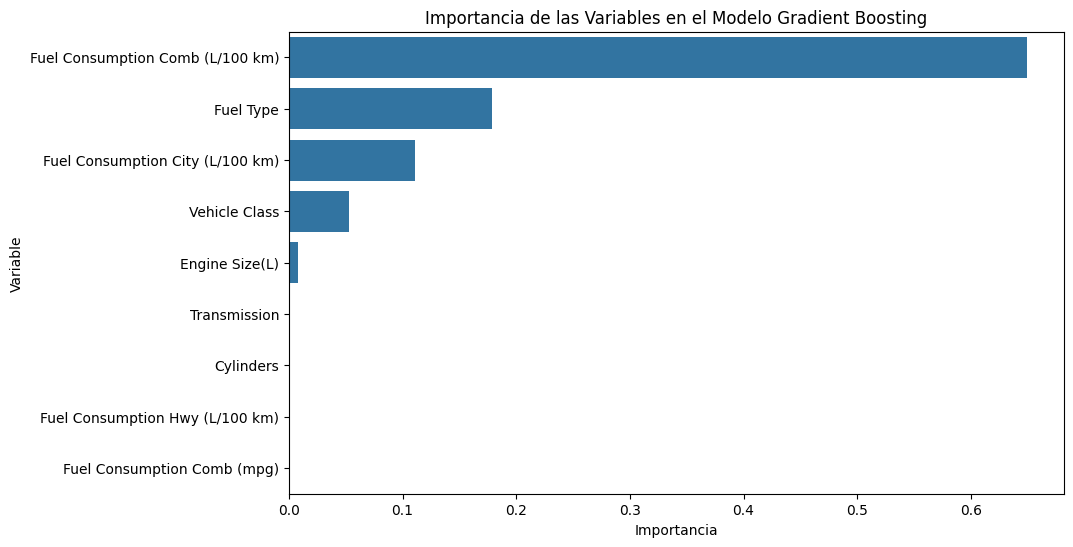

In [62]:
#Modelo con parámetros optimizados
XG_model = xgb.XGBRegressor(random_state=0, n_estimators=5, max_depth=3, learning_rate=1,subsample=0.8,colsample_bytree=1)
XG_model.fit(X_train, y_train)

#visualizar importancia de las variables con modelo optimizado
importances_XG = XG_model.feature_importances_
feature_names_XG = X_train.columns
feature_importance_XG = pd.DataFrame({'Variable': feature_names_XG, 'Importancia': importances_XG})
feature_importance_XG = feature_importance_XG.sort_values(by='Importancia', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_XG)
plt.title('Importancia de las Variables en el Modelo Gradient Boosting')

Como podemos observar, nuevamente la variable más importante en la predicción de emisión de CO2 es Fuel Consumption Comb (L/100 km). Sin embargo, a diferencia de los modelos Random Forest y Gradient Boost, en este modelo las variables Fuel Consumption Hwy y Fuel Consumption Comb (mpg) no son importantes. La variable "Transmission" nuevamente no resulta relevante en la predicción. Vehicle Class se vuelve más relevante que en modelo Gradient Boosting. Cylinders no aporta para la predicción.

### Entrenamiento del modelo

A continuación, entrenamos el modelo con los hiperparámetros óptimos. Aprovechamos para generar la matriz de confusión y las metricas.

In [88]:
#Modelo con parámetros optimizados
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

XG_model_optimo = xgb.XGBRegressor(random_state=0, n_estimators=5, max_depth=3, learning_rate=1,subsample=0.8,colsample_bytree=1)
XG_model_optimo.fit(X_train, y_train)

pred_train = XG_model_optimo.predict(X_train)
pred_test = XG_model_optimo.predict(X_test)


mae_XG = mean_absolute_error(y_test, pred_test)
mse_XG = mean_squared_error(y_test, pred_test)
rmse_XG = np.sqrt(mse_XG)
r2_XG = r2_score(y_test, pred_test)

Precision_train_XG=100.0*XG_model_optimo.score(X_train, y_train)
Precision_test_XG=100.0*XG_model_optimo.score(X_test, y_test)

# Imprimir las métricas de evaluación del modelo Gradient Boosting
print("Mean Absolute Error (MAE): {:.3f}".format(mae_XG))
print("Mean Squared Error (MSE): {:.3f}".format(mse_XG))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse_XG))
print("R-squared (R2): {:.3f}".format(r2_XG))
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(Precision_train_XG))
print("Precisión sobre los datos de test: {:.2f}".format(Precision_test_XG))

Mean Absolute Error (MAE): 5.750
Mean Squared Error (MSE): 60.471
Root Mean Squared Error (RMSE): 7.776
R-squared (R2): 0.982
Precisión sobre los datos de entrenamiento: 98.37
Precisión sobre los datos de test: 98.21


### Evaluación del modelo
La precisión de este modelo en los datos entrenamiento (R2) es de 98.37% y en los de prueba del 98.21%. Este desempeño es superior a los modelos Random Forest (96% entrenamiento y 95.7% prueba) y Gradient Boost (95.7% entrenamiento y 95.2% prueba).

#3. Evaluación de los modelos

Para la comparación de los modelos voy a utilizar como cambia la importancia de las variables en cada uno de ellos y las métricas de regresión

  * R2 (coeficiente de determinación)
  * MAE (coeficiente de determinación)
  * RMSE (Raíz del Error Cuadrático Medio)

**Importancia de las variables**

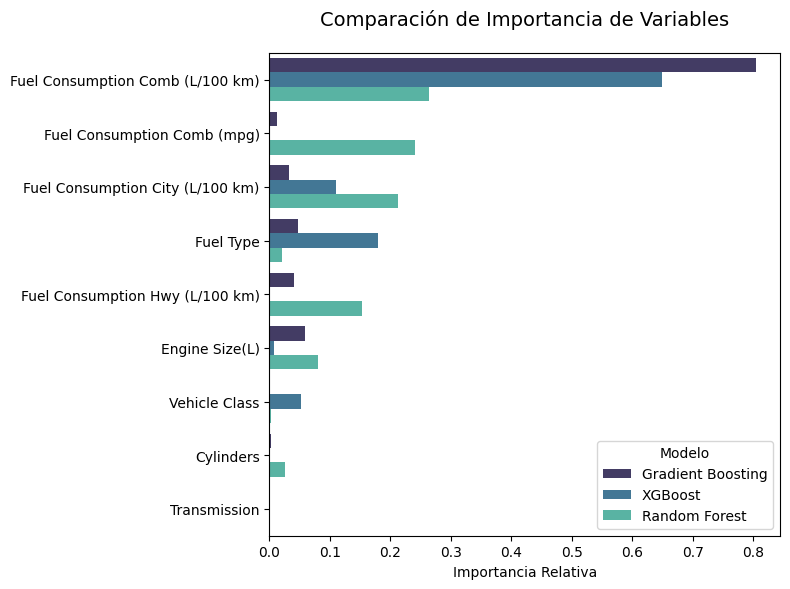

In [83]:
#Comparativo de la importancia entre variables por modelo
df_rf = feature_importance_rf.copy().assign(Modelo='Random Forest')
df_gb = feature_importance_GB.copy().assign(Modelo='Gradient Boosting')
df_xg = feature_importance_XG.copy().assign(Modelo='XGBoost')

df_comparativo = pd.concat([df_rf, df_gb, df_xg], ignore_index=True)
# Gráfico comparativo
plt.figure(figsize=(8, 6))
sns.barplot(x='Importancia',y='Variable',hue='Modelo',data=df_comparativo.sort_values('Importancia', ascending=False),
    palette='mako',errorbar=None)

plt.title('Comparación de Importancia de Variables', fontsize=14, pad=20)
plt.xlabel('Importancia Relativa', fontsize=10)
plt.ylabel('')
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

Como puede observarse, las variables tienen distinta importancia en cada modelo para predecir las emisiones de CO2. El modelo que considera menos variables para ello es el XGBoost. El que más variables utiliza es el Random Forest. En todos los casos, la variable más importante para la predicción es *Fuel Consumption Comb (L/100 km)*. En contraste, la variable que ningún modelo considera en la predicción es *Transmission*.

En los modelos Gradient Boosting y XGBoost, la variable *Fuel Consumption Comb (L/100 km)* tiene una importancia mayor al modelo  Random Forest. En general, los modelos Gradient Boosting y XGBoost parecen quitar relevancia a variables correlacionadas, como es el caso de consumo de combustible combinado, consumo de combustible en la ciudad, consumo de combustible en carretera y consumo de combustible combinado en unidades mpg.

**Comparativa a través de las métricas de regresión**

In [94]:
#Tabla con las metricas de cada modelo
Metricas = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'RMSE', 'R²', 'Precisión Train (%)', 'Precisión Test (%)'],
    'Random Forest': [
        f"{mae_RF:.3f}",
        f"{mse_RF:.3f}",
        f"{rmse_RF:.3f}",
        f"{r2_RF:.3f}",
        f"{Precision_train_RF:.2f}%",
        f"{Precision_test_RF:.2f}%"
    ],
    'Gradient Boosting': [
        f"{mae_GB:.3f}",
        f"{mse_GB:.3f}",
        f"{rmse_GB:.3f}",
        f"{r2_GB:.3f}",
        f"{Precision_train_GB:.2f}%",
        f"{Precision_test_GB:.2f}%"
    ],
    'XGBoost': [
        f"{mae_XG:.3f}",
        f"{mse_XG:.3f}",
        f"{rmse_XG:.3f}",
        f"{r2_XG:.3f}",
        f"{Precision_train_XG:.2f}%",
        f"{Precision_test_XG:.2f}%"
    ]
})

# Tabla comparativa
Metricas = Metricas.set_index('Métrica')
print(Metricas)


                    Random Forest Gradient Boosting XGBoost
Métrica                                                    
MAE                         6.447             9.760   5.750
MSE                       138.842           161.611  60.471
RMSE                       11.783            12.713   7.776
R²                          0.959             0.952   0.982
Precisión Train (%)        96.06%            95.70%  98.37%
Precisión Test (%)         95.89%            95.22%  98.21%


Como puede observarse del cuadro comparativo, el modelo con mejor R2 es el XGBoost (0.982). En términos de la precisión en los datos de entrenamiento y prueba, el mejor modelo también es el XGBoost.

El error medio absoluto (MAE) mide que tanto se desvia la predicción del valor real. Bajo este indicador, el modelo con menor desviación es nuevamente XGBoost, seguido por Random Forest y con mayor error, Gradient Boosting.

El RMSE o raíz del error cuadrático medio también mide las desviacioens entre la predicción y el valor real en la escala original de los datos (como el caso de MAE) pero penaliza errores grandes. Bajo este indicador, el mejor modelo es XGBoost, con el MSE más bajo. Le siguen el modelo Random Forest. El modelo con mayor MSE es el modelo Gradient Boosting, lo que indica que este modelo es más sensible a valores extremos o outliers.


##Conclusión

Dados los resultados observados, el mejor modeloes el XGBoost debido a su mayor precisión (elevada R2). Además utiliza menos variables para la predicción y logra niveles predicivos del 98% tanto en los datos de entrenamiento como en la predicción (no sobrajuste). Además, es el modelo con menor RMSE, por lo que es mejor para predecir los niveles de emisión de CO2, ya que, aun considerando valores extremos, es el más preciso.